In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diamondscsv/diamonds.csv


In [2]:
# loading the dataset into a DataFrame, 'index_col=0' is to avoid a repetition of the index column in our DataFrame
url = '/kaggle/input/diamondscsv/diamonds.csv'

diamonds_df = pd.read_csv(url, index_col=0)

In [3]:
# diaplaying five random rows of the DataFrame, this gives a better view of the DataFrame
diamonds_df.sample(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
43585,0.50,Fair,D,VS2,63.7,57.0,1431,5.05,4.90,3.17
50060,0.57,Ideal,E,VS2,61.0,54.0,2202,5.39,5.43,3.30
51268,0.70,Fair,D,SI2,58.1,60.0,2358,5.79,5.82,3.37
51317,0.31,Good,G,VS2,63.1,56.0,544,4.31,4.37,2.74
12620,1.00,Premium,F,SI1,58.6,58.0,5292,6.56,6.52,3.83


In [4]:
# displays number of rows and columns in the DataFrame
diamonds_df.shape

(53940, 10)

In [5]:
diamonds_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53940 entries, 1 to 53940
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


In [6]:
# displays statistical summary of numerical columns in the DataFrame
diamonds_df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


# Data Cleaning

In [7]:
diamonds_df.cut.unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [8]:
diamonds_df.color.unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [9]:
diamonds_df.clarity.unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [10]:
# replacing the values in some columns with numerical values
dict_1 = {'Ideal':5, 'Premium':4, 'Very Good':3, 'Good':2, 'Fair':1}
diamonds_df.cut = diamonds_df.cut.replace(dict_1)

dict_2 = {'D':7, 'E':6, 'F':5, 'G':4, 'H':3, 'I':2, 'J':1}
diamonds_df.color = diamonds_df.color.replace(dict_2)

dict_3 = {'IF':8, 'VVS1':7, 'VVS2':6, 'VS1':5, 'VS2':4, 'SI1':3, 'SI2':2, 'I1':1}
diamonds_df.clarity = diamonds_df.clarity.replace(dict_3)

# renaming the 'x','y','z' columns to more descriptive names
diamonds_df = diamonds_df.rename(columns={'x':'length_mm', 'y':'width_mm', 'z':'depth_mm'})

# removing dimensionless diamonds
diamonds_df = (diamonds_df.drop(diamonds_df[diamonds_df['length_mm']==0].index))
diamonds_df = (diamonds_df.drop(diamonds_df[diamonds_df['width_mm']==0].index))
diamonds_df = (diamonds_df.drop(diamonds_df[diamonds_df['depth_mm']==0].index))

# dropping duplicated rows in the DataFrame if there are any
diamonds_df = diamonds_df.drop_duplicates()

In [11]:
# statistical summary of columns in the DataFrame
diamonds_df.describe()

,carat,cut,color,clarity,depth,table,price,length_mm,width_mm,depth_mm
count,53775.000000,53775.000000,53775.000000,53775.000000,53775.000000,53775.000000,53775.000000,53775.000000,53775.000000,53775.000000
mean,0.797536,3.904231,4.406267,4.052366,61.748232,57.457806,3931.220288,5.731579,5.734909,3.539964
std,0.473169,1.116097,1.701271,1.646733,1.429639,2.233257,3985.918716,1.118611,1.139451,0.702017
min,0.200000,1.000000,1.000000,1.000000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,3.000000,3.000000,3.000000,61.000000,56.000000,951.000000,4.710000,4.720000,2.910000
50%,0.700000,4.000000,4.000000,4.000000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,5.000000,6.000000,5.000000,62.500000,59.000000,5324.000000,6.540000,6.540000,4.030000
max,5.010000,5.000000,7.000000,8.000000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [12]:
diamonds_df.sample(5)

,carat,cut,color,clarity,depth,table,price,length_mm,width_mm,depth_mm
52064,0.70,3,6,2,62.8,59.0,2453,5.64,5.69,3.56
4265,0.90,3,4,2,60.9,56.0,3581,6.18,6.24,3.78
7186,1.15,5,3,2,62.2,57.0,4186,6.68,6.63,4.14
26668,1.52,5,4,7,61.4,57.0,16492,7.40,7.38,4.54
27523,2.53,4,3,3,62.1,59.0,18254,8.83,8.73,5.45


In [13]:
diamonds_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53775 entries, 1 to 53940
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   carat      53775 non-null  float64
 1   cut        53775 non-null  int64  
 2   color      53775 non-null  int64  
 3   clarity    53775 non-null  int64  
 4   depth      53775 non-null  float64
 5   table      53775 non-null  float64
 6   price      53775 non-null  int64  
 7   length_mm  53775 non-null  float64
 8   width_mm   53775 non-null  float64
 9   depth_mm   53775 non-null  float64
dtypes: float64(6), int64(4)
memory usage: 4.5 MB


# Correlation

In [14]:
# importing the matplotlib and seaborn libraries
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<Axes: title={'center': 'Correlation'}>

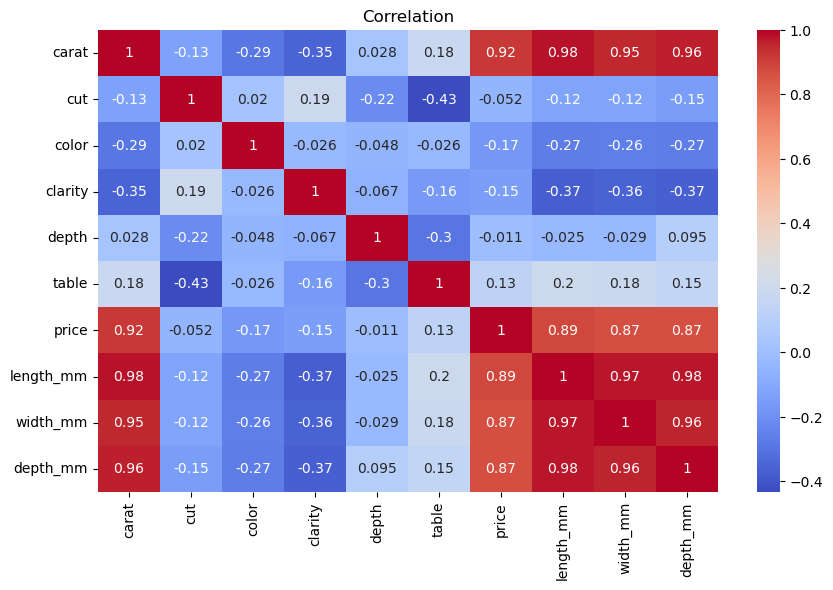

In [15]:
# shows correlation between numerical columns in the DataFrame
correlation_matrix = diamonds_df.corr()
plt.figure(figsize=(10,6))
plt.title('Correlation')
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

In [16]:
# From the heatmap above, we notice that the correlation between 'carat','length_mm','width_mm','depth_mm' ,and 'price' is high

# Random Forests

In [17]:
# dependent variable
y = diamonds_df.price

# independent variables
features = ['carat','cut','color','clarity','depth','table','length_mm','width_mm','depth_mm']
X = diamonds_df[features]

from sklearn.model_selection import train_test_split
train_X,validation_X, train_y,validation_y = train_test_split(X,y,random_state=0)

In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(train_X,train_y)

diamonds_pred = forest_model.predict(validation_X)
print('Mean Absolute Error:', mean_absolute_error(validation_y,diamonds_pred))

Mean Absolute Error: 272.5670390739009


In [19]:
# A DataFrame that displays the results of the actual and predicted price
results ={}
results['Predicted'] = diamonds_pred.round(2) # rounds up the predicted prices to two decimal places
results['Reality'] = validation_y

pd.DataFrame.from_dict(results)

,Predicted,Reality
43375,1505.12,1409
33117,898.23,816
37565,949.70,988
19831,8565.67,8398
29736,728.40,708
...,...,...
13489,5565.66,5537
49298,563.09,539
17574,6753.96,7076
6031,592.16,575


In [20]:
# Suggestions on how to improve the model are welcome